In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras import regularizers
import keras_tuner as kt

from sklearn.metrics import accuracy_score,precision_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(['RowNumber','CustomerId'],axis=1,inplace=True)

In [ ]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df.isna().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.drop(['Surname'],axis=1,inplace=True)

In [11]:
df = pd.get_dummies(df,drop_first=True,dtype=int)

In [12]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  int32  
 10  Geography_Spain    10000 non-null  int32  
 11  Gender_Male        10000 non-null  int32  
dtypes: float64(2), int32(3), int64(7)
memory usage: 820.4 KB


In [14]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Exited'],axis=1),df['Exited'],test_size=0.2,random_state=12)

In [15]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)

In [16]:
print(f"X_train shape:{x_train.shape}\t\t X_test shape :{x_test.shape}\t\t y_train shape:{y_train.shape}\t\t y_test shape :{y_test.shape}")

X_train shape:(8000, 11)		 X_test shape :(2000, 11)		 y_train shape:(8000,)		 y_test shape :(2000,)


In [17]:
model1 = Sequential()
model1.add(Dense(12,activation='relu',input_dim=11,))
model1.add(Dense(16,activation='sigmoid'))
model1.add(Dense(8,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

In [18]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 497 (1.94 KB)

 Trainable params: 497 (1.94 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model1.compile(optimizer='Adam',loss = "binary_crossentropy",metrics=['accuracy'])

In [20]:
history = model1.fit(x_train,y_train,epochs=100,validation_split=0.2,verbose=1)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7649 - loss: 0.5509 - val_accuracy: 0.8025 - val_loss: 0.4709
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8051 - loss: 0.4528 - val_accuracy: 0.8106 - val_loss: 0.4324
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8183 - loss: 0.4063 - val_accuracy: 0.8075 - val_loss: 0.4182
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8171 - loss: 0.3998 - val_accuracy: 0.8156 - val_loss: 0.4081
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8285 - loss: 0.3911 - val_accuracy: 0.8263 - val_loss: 0.3963
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8334 - loss: 0.3856 - val_accuracy: 0.8288 - val_loss: 0.3836
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8404 - loss: 0.3684 - val_accuracy: 0.8413 - val_loss: 0.3726
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8476 - loss: 0.3634 - val_accu

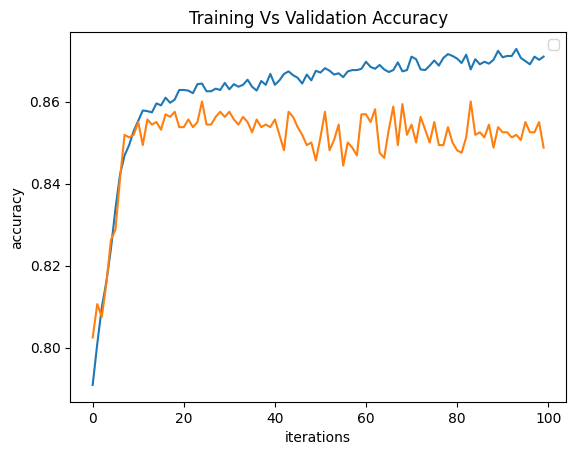

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.title('Training Vs Validation Accuracy')
plt.legend()

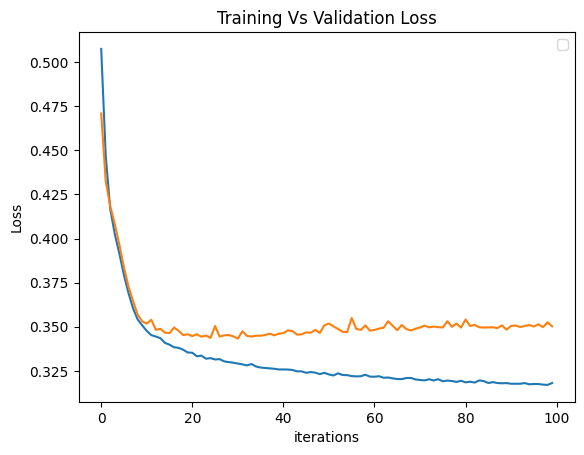

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.title('Training Vs Validation Loss')
plt.legend()

In [27]:
prediction = model1.predict(x_test)
prediction_binary = np.where(prediction>0.5,1,0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [28]:
accuracy_score(y_test,prediction_binary),precision_score(y_test,prediction_binary)

(0.8615, 0.7890909090909091)

### Hyperparameter Tuning

In [29]:
def build_model(hp):
    model = Sequential()

    # Hidden Layer 1
    units_1 = hp.Int("units_1", min_value = 8, max_value = 64, step = 8)
    initializer_1 =  hp.Choice("initializer_1", ['glorot_uniform', 'he_normal'])
    lambda_reg_1 = hp.Float("lambda_reg_1", min_value = 0.0001, max_value = 0.01, sampling = 'log')
    model.add(Dense(units=units_1,
                    kernel_initializer=initializer_1,
                    kernel_regularizer=regularizers.l2(lambda_reg_1),
                    input_dim = 11))

    Dense
    model.add(BatchNormalization())

    activation_1 = hp.Choice("activation_1", ['relu', 'tanh'])
    model.add(Activation(activation_1))
    
    dropout_rate_1 = hp.Float('dropout_1', min_value = 0.0, max_value = 0.4, step = 0.1)
    model.add(Dropout(dropout_rate_1))

    
    # Hidden Layer 2
    units_2 = hp.Int("units_2", min_value = 8, max_value = 32, step = 8)
    initializer_2 =  hp.Choice("initializer_2", ['glorot_uniform', 'he_normal'])
    lambda_reg_2 = hp.Float("lambda_reg_2", min_value = 0.0001, max_value = 0.01, sampling = 'log')
    
    model.add(Dense(units = units_2,
                    kernel_initializer=initializer_2,
                    kernel_regularizer=regularizers.l2(lambda_reg_2),))
    
    model.add(BatchNormalization())
    
    activation_2 = hp.Choice("activation_2", ['relu', 'tanh'])
    model.add(Activation(activation_2))
    
    dropout_rate_2 = hp.Float('dropout_2', min_value = 0.0, max_value = 0.4, step = 0.1)
    model.add(Dropout(dropout_rate_2))


    # Hidden Layer 3
    units_3 = hp.Int("units_3", min_value = 8, max_value = 16, step = 8)
    initializer_3 =  hp.Choice("initializer_3", ['glorot_uniform', 'he_normal'])
    lambda_reg_3 = hp.Float("lambda_reg_3", min_value = 0.0001, max_value = 0.01, sampling = 'log')
    
    model.add(Dense(units = units_3,
                    kernel_initializer=initializer_3,
                    kernel_regularizer=regularizers.l2(lambda_reg_3),))
    
    model.add(BatchNormalization())
    
    activation_3 = hp.Choice("activation_3", ['relu', 'tanh'])
    model.add(Activation(activation_3))
    
    dropout_rate_3 = hp.Float('dropout_3', min_value = 0.0, max_value = 0.4, step = 0.1)
    model.add(Dropout(dropout_rate_3))

    # Output Layer
    model.add(Dense(units = 1, activation='sigmoid'))

    # Optimizers
    optimizers_choice = hp.Choice("optimizer", ['adam', 'sgd','rmsprop'])
    learning_rate = hp.Float("learning_rate", min_value = 0.0001, max_value = 0.01, step = 0.001)
    if optimizers_choice == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate = learning_rate)

    elif optimizers_choice == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate = learning_rate)

    elif optimizers_choice == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate = learning_rate)

    # Model Compilation
    model.compile(loss = 'binary_crossentropy', 
                  # optimizer = 'adam', 
                  optimizer = optimizer,
                  metrics = ['accuracy'])
    # model.summary()
    return model


# Model Training
early_stop = EarlyStopping(monitor='val_loss', patience=5)

tuner = kt.RandomSearch(build_model, 
                        max_trials=20, 
                        objective="val_loss",
                        executions_per_trial = 1,
                        directory = 'Results', 
                        project_name = "My Project 3")

tuner.search(x_train, y_train,
             epochs = 200, 
             validation_data = (x_test, y_test),
             batch_size = 32,
             verbose = 2
             )

# Best Hyperparameters
best_hyp = tuner.get_best_hyperparameters(1)[0]
print("Best Hyperparameters:\n",)
print(best_hyp.values)

Trial 20 Complete [00h 03m 15s]
val_loss: 0.40411701798439026

Best val_loss So Far: 0.34346330165863037
Total elapsed time: 01h 11m 52s
Best Hyperparameters:

{'units_1': 40, 'initializer_1': 'he_normal', 'lambda_reg_1': 0.00011713931734866923, 'activation_1': 'relu', 'dropout_1': 0.4, 'units_2': 16, 'initializer_2': 'glorot_uniform', 'lambda_reg_2': 0.00019485187678669382, 'activation_2': 'tanh', 'dropout_2': 0.0, 'units_3': 8, 'initializer_3': 'he_normal', 'lambda_reg_3': 0.002544451904721607, 'activation_3': 'tanh', 'dropout_3': 0.2, 'optimizer': 'rmsprop', 'learning_rate': 0.0011}


### Best Model from Tuner and Save It

In [30]:
import os

os.makedirs("model", exist_ok=True)

In [31]:
# Get the best model
best_model = tuner.get_best_models(1)[0]

# Save the model
best_model.save("best_churn_model.h5")
best_model.save("model/best_churn_model.h5")
print("Model saved successfully.")


Model saved successfully.


### Load the Model Later and Predict on Test Data

In [32]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("model/best_churn_model.h5")

# Predict probabilities on test data
y_pred_proba = model.predict(x_test)

# Convert probabilities to class labels (0 or 1)
y_pred = (y_pred_proba > 0.5).astype(int)

# Optional: Flatten if needed
y_pred = y_pred.flatten()


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


### Evaluate the Model

In [33]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Test Precision: {precision:.4f}")

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.8665
Test Precision: 0.8288
Confusion Matrix:
 [[1520   44]
 [ 223  213]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1564
           1       0.83      0.49      0.61       436

    accuracy                           0.87      2000
   macro avg       0.85      0.73      0.77      2000
weighted avg       0.86      0.87      0.85      2000



### Plot Loss and Accuracy

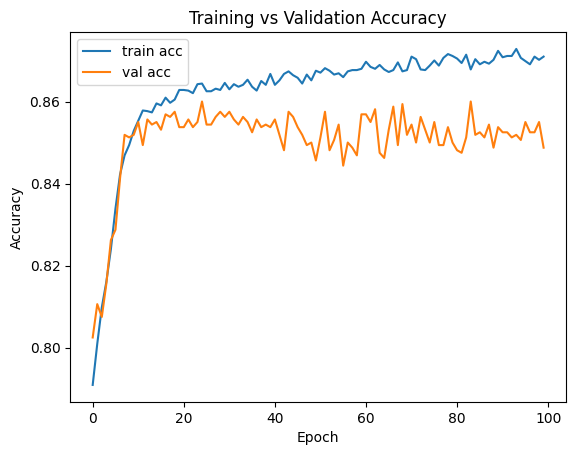

In [34]:
# Example assuming `history = best_model.fit(...)`
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()
